In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn.model_selection import KFold

In [5]:
df=pd.read_csv('DEMs_exp_log2.csv')

df['SD'][df['SD'] == 3] = 0

df.index = df['Unnamed: 0']
df.drop('Unnamed: 0', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df.head()

,hsa-miR-375,hsa-miR-29c*,hsa-miR-1258,hsa-miR-132*,hsa-miR-142-3p,hsa-miR-520c-3p,hsa-miR-302b,hsa-miR-204,hsa-miR-1468,hsa-miR-576-5p,hsa-miR-601,hsa-miR-609,hsa-miR-154,hsa-miR-508-3p,hsa-miR-942,hsa-miR-302d,hsa-miR-135b,hsa-miR-522,hsa-miR-488,hsa-miR-1262,hsa-miR-126*,hsa-miR-373,hsa-miR-483-3p,hsa-miR-133a,hsa-miR-190b,hsa-miR-598,hsa-miR-199b-5p,hsa-miR-1282,hsa-miR-1825,hsa-miR-130b*,hsa-miR-578,hsa-miR-520f,hsa-miR-26a-2*,hsa-miR-450a,hsa-miR-29b-1*,hsa-miR-615-3p,hsa-miR-892b,hsa-miR-1290,hsa-miR-556-3p,hsa-miR-98,...,hsa-miR-454*,hsa-miR-613,hsa-miR-302a,hsa-miR-376a*,hsa-miR-9,hsa-miR-520d-3p,hsa-miR-455-5p,hsa-miR-515-5p,hsa-miR-31*,hsa-miR-488*,hsa-miR-200a,hsa-miR-489,hsa-miR-1283,hsa-miR-566,hsa-miR-455-3p,hsa-miR-646,hsa-miR-519b-5p,hsa-miR-1245,hsa-miR-1291,hsa-miR-155*,hsa-miR-31,hsa-miR-518a-5p,hsa-miR-21*,hsa-miR-564,hsa-miR-933,hsa-miR-589,hsa-miR-545*,hsa-miR-520d-5p,hsa-miR-518d-5p,hsa-miR-96*,hsa-miR-136*,hsa-miR-491-3p,hsa-miR-568,hsa-miR-450b-5p,hsa-miR-556-5p,hsa-miR-10b*,hsa-miR-298,hsa-miR-889,hsa-miR-518d-3p,SD
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM1512142,1.000000,4.262995,4.262995,1.0,6.420548,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,4.262995,1.0,1.000000,2.336774,1.0,2.336774,1.000000,1.0,1.000000,1.000000,6.728644,5.450346,1.0,1.000000,1.000000,2.336774,6.248638,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.450346,4.262995,5.014422,1.0,4.262995,...,1.000000,1.0,1.0,1.0,4.262995,1.0,1.000000,7.828533,7.828533,7.059014,6.728644,8.273836,6.728644,7.319222,7.319222,9.504007,8.052603,6.248638,6.420548,4.262995,7.059014,8.455011,7.059014,7.828533,8.373233,6.248638,4.262995,6.420548,7.222831,6.728644,5.450346,6.420548,6.248638,5.781078,7.059014,6.038019,8.455011,1.000000,5.450346,0.0
GSM1512143,1.000000,1.000000,1.000000,1.0,4.370692,1.000000,1.0,1.0,1.0,1.0,1.391073,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.391073,1.0,1.000000,3.136886,6.436324,5.240589,1.0,3.136886,3.136886,1.000000,6.284242,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.240589,4.370692,1.391073,1.0,3.846243,...,1.000000,1.0,1.0,1.0,3.846243,1.0,1.391073,8.349497,8.656972,6.356608,6.436324,8.090505,6.170350,6.529228,7.960402,8.606451,7.835585,4.370692,7.004594,4.370692,7.336514,7.687020,4.370692,7.275976,8.201368,6.067018,5.062997,5.628266,8.431464,8.285002,6.170350,6.684122,6.836845,5.949447,7.336514,6.284242,7.150665,5.062997,5.062997,0.0
GSM1512144,1.000000,4.888494,1.000000,1.0,7.254011,1.654871,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,5.710041,1.000000,1.0,1.000000,1.000000,1.0,5.406824,1.000000,5.710041,6.701950,1.0,6.167703,1.654871,1.000000,5.824839,1.000000,4.888494,1.000000,4.050694,1.654871,1.654871,1.000000,5.580730,1.000000,1.0,7.643808,...,1.000000,1.0,1.0,1.0,1.000000,1.0,1.654871,6.768200,7.093676,5.935992,6.423491,7.036954,6.423491,5.935992,7.093676,7.575507,6.932835,5.710041,6.932835,4.470609,6.895560,7.093676,6.964425,7.332490,7.383830,6.574513,4.050694,5.935992,7.212345,7.212345,5.406824,6.340894,6.064883,5.935992,7.136268,5.853284,6.340894,4.470609,6.064883,0.0
GSM1512145,3.992913,1.000000,1.000000,1.0,6.236254,3.992913,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,2.484653,5.198381,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,6.071196,1.0,6.236254,1.000000,1.000000,1.000000,2.484653,1.000000,2.484653,1.000000,1.000000,3.992913,2.484653,1.000000,3.992913,1.0,7.413773,...,3.992913,1.0,1.0,1.0,2.484653,1.0,3.992913,7.215294,7.687020,6.071196,6.990446,7.083919,6.720574,6.071196,7.083919,7.592523,7.215294,5.576247,6.806830,5.847563,6.720574,7.215294,6.621930,6.720574,7.158045,5.847563,5.198381,6.236254,7.336514,7.476855,5.576247,6.523319,6.236254,5.847563,7.687020,6.236254,5.847563,5.198381,5.198381,0.0
GSM1512146,1.000000,3.155257,1.000000,1.0,4.745715,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,3.155257,5.822897,1.0,4.745715,1.000000,1.000000,4.745715,1.00000

In [ ]:
df['SD'].value_counts()

0.0    94
1.0    62
Name: SD, dtype: int64

**NOTE:** '0' classs represents 'Healthy' and '1' class represents 'MI'.

# Gradiant Boosting

In [7]:
#defining scoring for all furthur uses in cross validation
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']

## Basic Gradiant Boost model

In [8]:
# Seperating informative and target data, and splitting it into train and test
X=df.drop('SD', axis=1)
y=df['SD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
GB_basic=GradientBoostingClassifier(random_state=1)
scores = cross_validate(GB_basic, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True, return_estimator =True)
scores1=pd.DataFrame(scores).drop(['estimator'], axis=1)
scores1

,fit_time,score_time,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy
0,0.350854,0.010662,0.678571,1.0,0.708333,1.0,0.685714,1.0,0.727273,1.0
1,0.342926,0.009575,0.638889,1.0,0.604167,1.0,0.611765,1.0,0.727273,1.0
2,0.350810,0.009057,0.277778,1.0,0.357143,1.0,0.312500,1.0,0.454545,1.0
3,0.336572,0.009222,0.937500,1.0,0.875000,1.0,0.895238,1.0,0.909091,1.0
4,0.367388,0.009204,0.888889,1.0,0.750000,1.0,0.770833,1.0,0.818182,1.0
5,0.352615,0.009295,0.410714,1.0,0.410714,1.0,0.410714,1.0,0.454545,1.0
6,0.370267,0.009319,0.803571,1.0,0.803571,1.0,0.803571,1.0,0.818182,1.0
7,0.369794,0.009077,0.937500,1.0,0.875000,1.0,0.895238,1.0,0.909091,1.0
8,0.356064,0.009098,0.850000,1.0,0.625000,1.0,0.611765,1.0,0.727273,1.0
9,0.333159,0.005733,0.937500,1.0,0.833333,1.0,0.866667,1.0,0.900000,1.0


In [10]:
cols=list(scores1.columns)
cols[0]='Model'
cols[1]='No. of miRs' 

In [11]:
result1=list(scores1.mean(axis=0))
result1[0]='Basic Gradiant Boost'
result1[1]='100'
results = pd.DataFrame([result1], columns=cols)
results

,Model,No. of miRs,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy
0,Basic Gradiant Boost,100,0.736091,1.0,0.684226,1.0,0.686401,1.0,0.744545,1.0


### Training the model with the best 6 from the basic random forest


In [12]:
# Selecting the most important miRNAs by finding the most repeated ones in all 10 cross validation
imp_mirs=[]
for idx,estimator in enumerate(scores['estimator']):
    imp=estimator.feature_importances_
    mirs= list(estimator.feature_names_in_[imp.argsort()[-10:][::-1]])
    imp_mirs+=mirs

imp_mirs=pd.DataFrame({'miRs': imp_mirs})
count=pd.DataFrame({'count':imp_mirs['miRs'].value_counts()})
imp_mirs=list(count.index[0:6])
imp_mirs

['hsa-miR-133a',
 'hsa-miR-518a-5p',
 'hsa-miR-1291',
 'hsa-miR-132*',
 'hsa-miR-629',
 'hsa-miR-1258']

In [13]:
X_temp=df[imp_mirs]
y_temp=df['SD']
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=1)

In [14]:
GB_basic_6mirs=GradientBoostingClassifier(random_state=1)
scores = cross_validate(GB_basic_6mirs, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True, return_estimator =True)
scores2=pd.DataFrame(scores).drop(['estimator'], axis=1)
scores2

,fit_time,score_time,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy
0,0.111941,0.008974,0.944444,1.0,0.833333,1.0,0.870588,1.0,0.909091,1.0
1,0.105349,0.009104,0.678571,1.0,0.708333,1.0,0.685714,1.0,0.727273,1.0
2,0.124434,0.009401,0.803571,1.0,0.803571,1.0,0.803571,1.0,0.818182,1.0
3,0.110574,0.009326,0.833333,1.0,0.857143,1.0,0.816667,1.0,0.818182,1.0
4,0.111854,0.009933,0.888889,1.0,0.750000,1.0,0.770833,1.0,0.818182,1.0
5,0.101001,0.009367,0.533333,1.0,0.535714,1.0,0.529915,1.0,0.545455,1.0
6,0.111750,0.009687,0.716667,1.0,0.732143,1.0,0.717949,1.0,0.727273,1.0
7,0.100461,0.016163,0.888889,1.0,0.750000,1.0,0.770833,1.0,0.818182,1.0
8,0.098417,0.009022,0.850000,1.0,0.625000,1.0,0.611765,1.0,0.727273,1.0
9,0.106193,0.005130,0.761905,1.0,0.761905,1.0,0.761905,1.0,0.800000,1.0


In [15]:
result2=list(scores2.mean(axis=0))
result2[0]='Basic Gradiant Boost'
result2[1]='6'
result2 = pd.DataFrame([result2], columns=cols)
results = pd.concat([results, result2], axis=0)
results

,Model,No. of miRs,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy
0,Basic Gradiant Boost,100,0.736091,1.0,0.684226,1.0,0.686401,1.0,0.744545,1.0
0,Basic Gradiant Boost,6,0.789960,1.0,0.735714,1.0,0.733974,1.0,0.770909,1.0


## Grid Search

### All together

In [16]:
# Seperating informative and target data, and splitting it into train and test
X=df.drop('SD', axis=1)
y=df['SD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
param_grid = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate' : [0.01, 0.1, 0.5],
    'n_estimators' : [50, 100, 200, 300],
    'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'max_depth' : [3, 6, 9, 15],
    'max_features' : [2, 3, 4, 5, 6],
}
base_estimator = GradientBoostingClassifier(random_state=1)

grid_search=GridSearchCV(base_estimator, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

{'criterion': 'mae',
 'learning_rate': 0.5,
 'loss': 'exponential',
 'max_depth': 3,
 'max_features': 5,
 'n_estimators': 300}

In [17]:
GB_GS_best=GradientBoostingClassifier(criterion='mae', max_depth=3, max_features=5,n_estimators=300, learning_rate=0.5, loss='exponential')
scores = cross_validate(GB_GS_best, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True, return_estimator =True)
scores3=pd.DataFrame(scores).drop(['estimator'], axis=1)
scores3

,fit_time,score_time,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy
0,0.831234,0.011847,0.678571,1.0,0.708333,1.0,0.685714,1.0,0.727273,1.0
1,0.799298,0.010675,0.944444,1.0,0.833333,1.0,0.870588,1.0,0.909091,1.0
2,0.830049,0.009645,0.277778,1.0,0.357143,1.0,0.312500,1.0,0.454545,1.0
3,0.807618,0.009975,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
4,0.761419,0.015305,0.888889,1.0,0.750000,1.0,0.770833,1.0,0.818182,1.0
5,0.770771,0.029023,0.410714,1.0,0.410714,1.0,0.410714,1.0,0.454545,1.0
6,0.671969,0.009855,0.803571,1.0,0.803571,1.0,0.803571,1.0,0.818182,1.0
7,0.827696,0.027181,0.937500,1.0,0.875000,1.0,0.895238,1.0,0.909091,1.0
8,0.743425,0.009829,0.888889,1.0,0.750000,1.0,0.770833,1.0,0.818182,1.0
9,0.732047,0.005906,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0


In [18]:
result3=list(scores3.mean(axis=0))
result3[0]='Gradiant Boost Best parameters by Grid Search'
result3[1]='100'
result3 = pd.DataFrame([result3], columns=cols)
results = pd.concat([results, result3], axis=0)
results

,Model,No. of miRs,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy
0,Basic Gradiant Boost,100,0.736091,1.0,0.684226,1.0,0.686401,1.0,0.744545,1.0
0,Basic Gradiant Boost,6,0.789960,1.0,0.735714,1.0,0.733974,1.0,0.770909,1.0
0,Gradiant Boost Best parameters by Grid Search,100,0.783036,1.0,0.748810,1.0,0.751999,1.0,0.790909,1.0


#### Training the GS best model with the best 6 from the GS best gradiant boost




In [19]:
# Selecting the most important miRNAs by finding the most repeated ones in all 10 cross validation
imp_mirs=[]
for idx,estimator in enumerate(scores['estimator']):
    imp=estimator.feature_importances_
    mirs= list(estimator.feature_names_in_[imp.argsort()[-10:][::-1]])
    imp_mirs+=mirs

imp_mirs=pd.DataFrame({'miRs': imp_mirs})
count=pd.DataFrame({'count':imp_mirs['miRs'].value_counts()})
imp_mirs=list(count.index[0:6])
imp_mirs

['hsa-miR-132*',
 'hsa-miR-133a',
 'hsa-miR-126*',
 'hsa-miR-483-3p',
 'hsa-miR-646',
 'hsa-miR-375']

In [20]:
X_temp=df[imp_mirs]
y_temp=df['SD']
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=1)

In [21]:
GB_GS_best_6mirs=GradientBoostingClassifier(criterion='mae', max_depth=3, max_features=5,n_estimators=300, learning_rate=0.5, loss='exponential')
scores = cross_validate(GB_GS_best_6mirs, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True, return_estimator =True)
scores4=pd.DataFrame(scores).drop(['estimator'], axis=1)
scores4

,fit_time,score_time,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy
0,0.724603,0.009041,0.566667,1.000000,0.583333,1.000000,0.529915,1.000000,0.545455,1.000000
1,0.767569,0.018925,0.638889,0.944444,0.604167,0.882353,0.611765,0.903922,0.727273,0.918367
2,0.716909,0.008485,0.716667,1.000000,0.732143,1.000000,0.717949,1.000000,0.727273,1.000000
3,0.766989,0.008547,0.650000,0.945205,0.660714,0.878788,0.633333,0.902049,0.636364,0.918367
4,0.888068,0.009631,0.708333,0.939189,0.678571,0.863636,0.685714,0.888679,0.727273,0.908163
5,0.776889,0.009593,0.479167,0.964286,0.482143,0.924242,0.476190,0.940498,0.545455,0.948980
6,0.686832,0.008560,0.785714,0.927632,0.785714,0.833333,0.727273,0.860993,0.727273,0.887755
7,0.703826,0.008686,0.937500,0.945205,0.875000,0.878788,0.895238,0.902049,0.909091,0.918367
8,0.817955,0.005411,0.300000,1.000000,0.428571,1.000000,0.352941,1.000000,0.545455,1.000000
9,0.719619,0.009287,0.875000,0.939189,0.928571,0.867647,0.890110,0.891355,0.900000,0.909091


In [22]:
result4=list(scores4.mean(axis=0))
result4[0]='Gradiant Boost Best parameters by Grid Search'
result4[1]='6'
result4 = pd.DataFrame([result4], columns=cols)
results = pd.concat([results, result4], axis=0)
results

,Model,No. of miRs,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy
0,Basic Gradiant Boost,100,0.736091,1.000000,0.684226,1.000000,0.686401,1.000000,0.744545,1.000000
0,Basic Gradiant Boost,6,0.789960,1.000000,0.735714,1.000000,0.733974,1.000000,0.770909,1.000000
0,Gradiant Boost Best parameters by Grid Search,100,0.783036,1.000000,0.748810,1.000000,0.751999,1.000000,0.790909,1.000000
0,Gradiant Boost Best parameters by Grid Search,6,0.665794,0.960515,0.675893,0.912879,0.652043,0.928954,0.699091,0.940909


### Every time, I have ran the search for one parameter and add the best value for that parameter to the model




In [23]:
# Seperating informative and target data, and splitting it into train and test
X=df.drop('SD', axis=1)
y=df['SD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
param_grid = {
    #'loss' : ['deviance', 'exponential']
    #'learning_rate' : [0.01, 0.1, 0.5]
    #'n_estimators' : [50, 100, 200, 300]
    #'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae']
    #'max_depth' : [3, 6, 9, 15]
    'max_features' : [2, 3, 4, 5, 6]
}
base_estimator = GradientBoostingClassifier(random_state=1)

grid_search=GridSearchCV(base_estimator, param_grid=param_grid,
                         cv=10, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1, param_grid={'max_features': [2, 3, 4, 5, 6]})

In [24]:
GB_GS_best_1by1=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_depth=3, 
                                        max_features=3, criterion='friedman_mse', random_state=1)
scores = cross_validate(GB_GS_best_1by1, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True, return_estimator =True)
scores5=pd.DataFrame(scores).drop(['estimator'], axis=1)
scores5

,fit_time,score_time,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy
0,0.193934,0.009734,0.770833,1.0,0.770833,1.0,0.770833,1.0,0.818182,1.0
1,0.184572,0.009672,0.944444,1.0,0.833333,1.0,0.870588,1.0,0.909091,1.0
2,0.208689,0.010214,0.277778,1.0,0.357143,1.0,0.312500,1.0,0.454545,1.0
3,0.204858,0.010060,0.900000,1.0,0.928571,1.0,0.905983,1.0,0.909091,1.0
4,0.217785,0.010009,0.888889,1.0,0.750000,1.0,0.770833,1.0,0.818182,1.0
5,0.190481,0.010703,0.708333,1.0,0.678571,1.0,0.685714,1.0,0.727273,1.0
6,0.216695,0.010768,0.708333,1.0,0.678571,1.0,0.685714,1.0,0.727273,1.0
7,0.199011,0.023758,0.937500,1.0,0.875000,1.0,0.895238,1.0,0.909091,1.0
8,0.184367,0.010132,0.888889,1.0,0.750000,1.0,0.770833,1.0,0.818182,1.0
9,0.191181,0.007874,0.937500,1.0,0.833333,1.0,0.866667,1.0,0.900000,1.0


In [25]:
result5=list(scores5.mean(axis=0))
result5[0]='Gradiant Boost Best parameters by Grid Search (one parameter at a time)'
result5[1]='100'
result5 = pd.DataFrame([result5], columns=cols)
results = pd.concat([results, result5], axis=0)
results

,Model,No. of miRs,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy
0,Basic Gradiant Boost,100,0.736091,1.000000,0.684226,1.000000,0.686401,1.000000,0.744545,1.000000
0,Basic Gradiant Boost,6,0.789960,1.000000,0.735714,1.000000,0.733974,1.000000,0.770909,1.000000
0,Gradiant Boost Best parameters by Grid Search,100,0.783036,1.000000,0.748810,1.000000,0.751999,1.000000,0.790909,1.000000
0,Gradiant Boost Best parameters by Grid Search,6,0.665794,0.960515,0.675893,0.912879,0.652043,0.928954,0.699091,0.940909
0,Gradiant Boost Best parameters by Grid Search ...,100,0.796250,1.000000,0.745536,1.000000,0.753490,1.000000,0.799091,1.000000


#### Training the GS best model with the best 6 from the GS best gradiant boost

In [26]:
# Selecting the most important miRNAs by finding the most repeated ones in all 10 cross validation
imp_mirs=[]
for idx,estimator in enumerate(scores['estimator']):
    imp=estimator.feature_importances_
    mirs= list(estimator.feature_names_in_[imp.argsort()[-10:][::-1]])
    imp_mirs+=mirs

imp_mirs=pd.DataFrame({'miRs': imp_mirs})
count=pd.DataFrame({'count':imp_mirs['miRs'].value_counts()})
imp_mirs=list(count.index[0:6])
imp_mirs

['hsa-miR-488*',
 'hsa-miR-133a',
 'hsa-miR-132*',
 'hsa-miR-29c*',
 'hsa-miR-892b',
 'hsa-miR-518d-5p']

In [27]:
X_temp=df[imp_mirs]
y_temp=df['SD']
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=1)

In [28]:
GB_GS_best_1by1_6mirs=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_depth=3, 
                                        max_features=3, criterion='friedman_mse', random_state=1)
scores = cross_validate(GB_GS_best_1by1_6mirs, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True, return_estimator =True)
scores6=pd.DataFrame(scores).drop(['estimator'], axis=1)
scores6

,fit_time,score_time,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy
0,0.388515,0.012111,0.770833,1.0,0.770833,1.0,0.770833,1.0,0.818182,1.0
1,0.385497,0.026169,0.482143,1.0,0.479167,1.0,0.476190,1.0,0.545455,1.0
2,0.403245,0.030869,0.708333,1.0,0.678571,1.0,0.685714,1.0,0.727273,1.0
3,0.261125,0.008581,0.900000,1.0,0.928571,1.0,0.905983,1.0,0.909091,1.0
4,0.310345,0.022840,0.708333,1.0,0.678571,1.0,0.685714,1.0,0.727273,1.0
5,0.381555,0.015284,0.607143,1.0,0.607143,1.0,0.607143,1.0,0.636364,1.0
6,0.506281,0.027191,0.607143,1.0,0.607143,1.0,0.607143,1.0,0.636364,1.0
7,0.377627,0.015195,0.607143,1.0,0.607143,1.0,0.607143,1.0,0.636364,1.0
8,0.323413,0.008509,0.300000,1.0,0.428571,1.0,0.352941,1.0,0.545455,1.0
9,0.341585,0.013650,0.937500,1.0,0.833333,1.0,0.866667,1.0,0.900000,1.0


In [29]:
result6=list(scores6.mean(axis=0))
result6[0]='Gradint Boost Best parameters by Grid Search'
result6[1]='6'
result6 = pd.DataFrame([result6], columns=cols)
results = pd.concat([results, result6], axis=0)
results

,Model,No. of miRs,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy
0,Basic Gradiant Boost,100,0.736091,1.000000,0.684226,1.000000,0.686401,1.000000,0.744545,1.000000
0,Basic Gradiant Boost,6,0.789960,1.000000,0.735714,1.000000,0.733974,1.000000,0.770909,1.000000
0,Gradiant Boost Best parameters by Grid Search,100,0.783036,1.000000,0.748810,1.000000,0.751999,1.000000,0.790909,1.000000
0,Gradiant Boost Best parameters by Grid Search,6,0.665794,0.960515,0.675893,0.912879,0.652043,0.928954,0.699091,0.940909
0,Gradiant Boost Best parameters by Grid Search ...,100,0.796250,1.000000,0.745536,1.000000,0.753490,1.000000,0.799091,1.000000
0,Gradint Boost Best parameters by Grid Search,6,0.662857,1.000000,0.661905,1.000000,0.656547,1.000000,0.708182,1.000000


## Demonestration of metrices

In [30]:
results=results.reset_index(drop=True)

In [31]:
results

,Model,No. of miRs,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,test_accuracy,train_accuracy
0,Basic Gradiant Boost,100,0.736091,1.000000,0.684226,1.000000,0.686401,1.000000,0.744545,1.000000
1,Basic Gradiant Boost,6,0.789960,1.000000,0.735714,1.000000,0.733974,1.000000,0.770909,1.000000
2,Gradiant Boost Best parameters by Grid Search,100,0.783036,1.000000,0.748810,1.000000,0.751999,1.000000,0.790909,1.000000
3,Gradiant Boost Best parameters by Grid Search,6,0.665794,0.960515,0.675893,0.912879,0.652043,0.928954,0.699091,0.940909
4,Gradiant Boost Best parameters by Grid Search ...,100,0.796250,1.000000,0.745536,1.000000,0.753490,1.000000,0.799091,1.000000
5,Gradint Boost Best parameters by Grid Search,6,0.662857,1.000000,0.661905,1.000000,0.656547,1.000000,0.708182,1.000000


In [32]:
results['Model2']=['Basic GB', 'Basic GB', 'GS GB', 'GS GB', 'GS GB 1by1', 'GS GB 1by1']

<Figure size 720x2160 with 0 Axes>

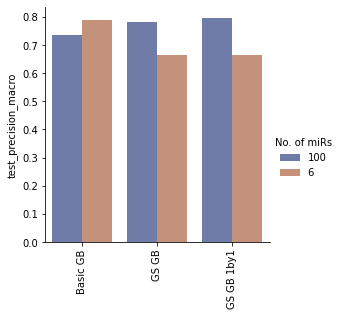

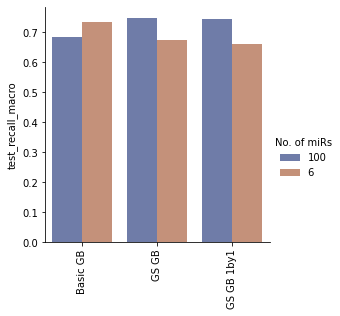

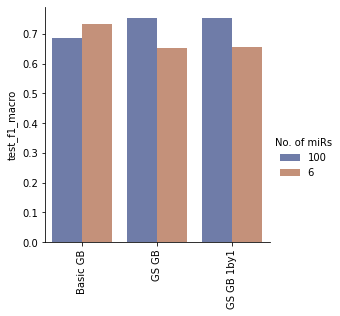

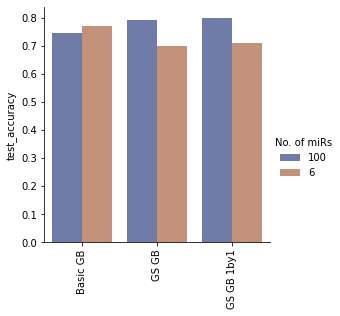

In [34]:
plt.figure(num=4, figsize=(10,30))
for i in range(1,5):
  col=results.columns[i*2]
  data=results[['Model2', 'No. of miRs', col]]
  sns.catplot(data=data, kind="bar", x="Model2", y=col, hue="No. of miRs", ci="sd", palette="dark", alpha=.6, height=4)
  plt.xlabel('')
  plt.tick_params(axis='x', which='major', labelsize=10, rotation=90)
  plt.savefig('GB_metrices_%i.pdf' % i, bbox_inches='tight')

# Nested

## GB

In [ ]:
# configure the cross-validation procedure
cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
model = GradientBoostingClassifier(random_state=1)

param_grid = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate' : [0.01, 0.1, 0.5],
    'n_estimators' : [50, 100, 200, 300],
    'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'max_depth' : [3, 6, 9, 15],
    'max_features' : [2, 3, 4, 5, 6],
}

In [ ]:
search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=cv_inner, refit=True)

In [ ]:
# execute the nested cross-validation
scoring = ['precision_macro', 'recall_macro', 'roc_auc_ovo_weighted', 'accuracy']
scores = cross_validate(search, X_train, y_train, scoring=scoring, cv=cv_outer, n_jobs=-1,
                        return_train_score=True)

In [ ]:
scores

In [ ]:
sc=pd.DataFrame(scores)
sc.describe().T

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
